In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
# tf에서 제공하는 데이터셋 불러오기
from tensorflow.keras import datasets

%matplotlib inline

mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data("mnist.npz")

print(train_x.shape) #(배치사이즈, 세로(행)), 가로(열), channel)


(60000, 28, 28)


(28, 28)


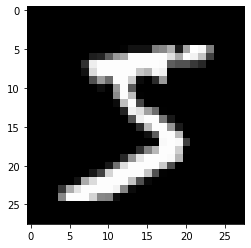

In [2]:
img = train_x[0]
print(img.shape)
plt.imshow(img, 'gray')

In [3]:
# nparray의 차원확장

train_ex = np.expand_dims(train_x, -1)
print(train_ex.shape)

(60000, 28, 28, 1)


## TF의 차원확장

In [4]:
# tf의 차원확장

train_ex_tf = tf.expand_dims(train_x, -1)
train_ex_tf.shape

train_ex_tf = train_x[..., tf.newaxis] #위와 동일한 기능
train_ex_tf = train_x[tf.newaxis, ..., tf.newaxis] # 차원확장 이런것도 가능!

train_ex_tf = train_x.reshape([60000, 28, 28, 1]) #tf.reshape으로도 가능!

train_ex_tf.shape

(60000, 28, 28, 1)

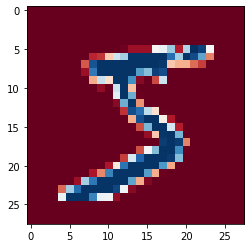

In [5]:
# 확장한 이미지를 plot하기 위해

plt.imshow(train_ex_tf[0, :, :, 0], 'gray') #마지막 차원 0으로 고정시켜줘야함

#또는 sqeeze 이용
plt.imshow(np.squeeze(train_ex_tf[0]), 'RdBu') # (60000, 28, 28, 1) -> (0, 28, 28) 선택

plt.show()


5


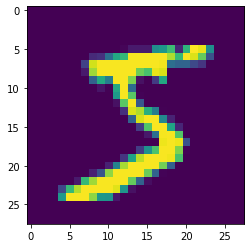

In [6]:
print(train_y[0])
plt.imshow(train_x[0])
plt.show()

In [7]:
# oneHot Encoding [0, 1, 0, 0, 0, 0, 0] 꼴

# tensorflow의 keras가 제공해주는 변환툴 이용

from tensorflow.keras.utils import to_categorical

In [8]:
to_categorical(1, 10) #(숫자, 전체개수)

label = train_y[0]
label_onehot = to_categorical(label, 10)

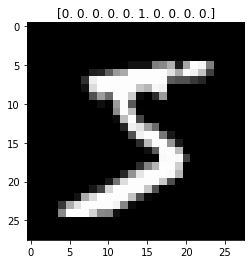

In [9]:
plt.title(label_onehot) # 제목에 표시
plt.imshow(train_x[0], 'gray')
plt.show()

# CNN 구성하기

(1, 28, 28, 5)


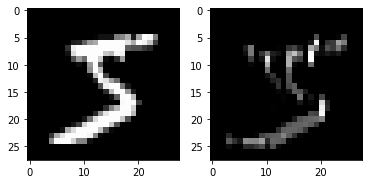

In [10]:
image = train_x[0]
image = image[tf.newaxis, ..., tf.newaxis]


# 커널 제작
layer = tf.keras.layers.Conv2D(filters=5, kernel_size = (3, 3), strides = (1, 1), padding='SAME', activation='relu')
layer2 = tf.keras.layers.Conv2D(5, 3, 1, 'SAME') #위와 동일, relu 빠진것만 빼면
'''
filters는 이제 생성할 커널의 개수
kernel_size 는 커널 사이즈~
strides: 합성곱 진행할때 얼마씩 이동할건지
padding: 여유공간 (쫍아지니깐)), 컨볼루션을해도 사이즈가 많이 안변하도록

Conv층에서 activation까지 하도록 설정
activation: relu (음수값 다 날림.)
'''

# Visualizers
image = tf.cast(image, dtype = tf.float32)
image.dtype


output2 = layer2(image)

output = layer(image)
print(output.shape) #필터 수 만큼 널 바뀜

plt.subplot(121)
plt.imshow(np.squeeze(image), 'gray') # 원본

plt.subplot(122)
plt.imshow(output[0,:,:,0], 'gray') # 필터
plt.show()

(3, 3, 1, 5)
(5,)


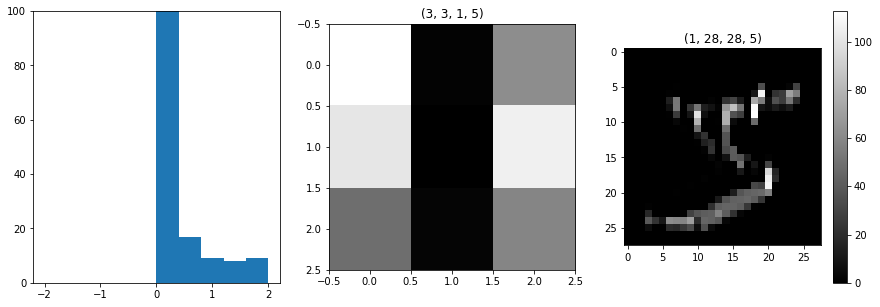

In [11]:
#get_weights() 함수의 [0]: weight, [1]: bias
weight = layer.get_weights()


print(weight[0].shape)
print(weight[1].shape) ## 이후에 다룰예정이래


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().reshape(-1), range = [-2, 2])
plt.ylim(0, 100)

plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')

plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')

plt.colorbar()

plt.show()


# pooling
> 압축한다고 생각하면 편함
> (n, n)에서 가장 큰값, 또는 작은 값 선택

In [12]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides =(2, 2), padding="SAME")
pool_output = pool_layer(output)

print(output.shape)
print(pool_output.shape) #사이즈가 반으로 줄어드는거 확인 가능

(1, 28, 28, 5)
(1, 14, 14, 5)


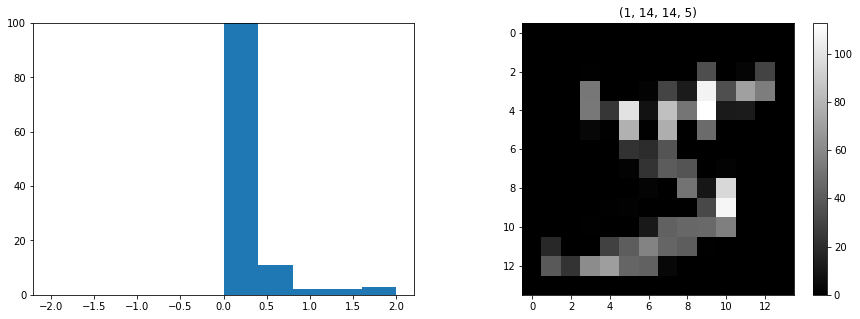

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# DNN

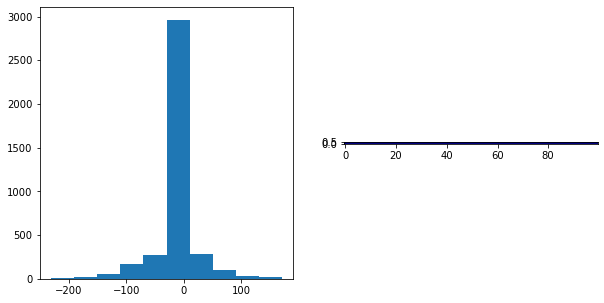

In [26]:
# 이미지 1차원으로 펴기 (ravel과 유사)

layer = tf.keras.layers.Flatten()
flatten = layer(output2)

output.numpy().ravel().shape # ravel만 할 시 (3920, )
flatten.shape # [1, 3920], 1은 배치사이즈

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.hist(flatten.numpy().ravel())

plt.subplot(122)
plt.imshow(flatten[:, :100], 'jet')
plt.ylim([0, 0.5])
plt.show()

In [27]:
layer = tf.keras.layers.Dense(32, activation='relu') #Dense(세로 초록색의 갯수)
# 3920개를 32개에 연결, 따라서 shape [1, 3920] -> [1, 32] 변경

output = layer(flatten)

In [28]:
layer_2 = tf.keras.layers.Dense(10, activation = 'relu')
output_2 = layer_2(output)

output_2.shape

TensorShape([1, 10])

In [29]:
layer = tf.keras.layers.Dropout(0.7) # 학습할때만 잠깐 끊어주는거
output = layer(output)
output.shape

TensorShape([1, 32])

# 정리

In [31]:
from tensorflow.keras import layers
# 매번, tf.keras.layers는 번거로우니 layers로 불러옴

input_shape = (28, 28, 1) #input으로 들어갈 크기 지정
num_classes = 10 #클래스 개수

#---------Feature Extraction----------#

inputs = layers.Input(shape=input_shape)

net = layers.Conv2D(32, 3, padding='SAME')(inputs) # 아깐 layer(input) 이런식으로 넣었는데 이렇게 한번에 넣을수있음
net = layers.Activation('relu')(net)

net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.MaxPool2D((2,2))(net) # 풀링

net = layers.Dropout(0.25)(net) # 드랍아웃



net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.MaxPool2D((2,2))(net)

net = layers.Dropout(0.25)(net)

#-------------------------------------#



# Fully Connected

net = layers.Flatten()(net) # [1, 3920] 꼴로 펴기
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)

net = layers.Dense(num_classes)(net) # 마지막에 내보내는 노드의 갯수는 총 10개. (결과의 결과)

net = layers.Activation('softmax')(net) # 최종적으로 들어오는 수치들을 0~1 사이의 값으로 만들어줌

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Basic_CNN')

In [32]:
model.summary() #모델 구성 정보 확인 가능
# 배치사이즈 None / 세로 가로 28 28 / 채널 32~64

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0 

# 에러율 (Loss function)
## Categorical vs Binary
> 이진분류에는 Binary, 그 이상에는 Categorical


In [33]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

tf.keras.losses.sparse_categorical_crossentropy # onehot 인코딩을 하지 않은경우 // 입력을 [1, 3, 4] 이런식으로 줘도 됨
loss_func = tf.keras.losses.categorical_crossentropy #oneHot 인코딩을 한 경우 // 입력을 [0, 0, 0, 1, 0, 0, 0] 이런식으로 줘야함

# Metrics
모델을 평가하는 방법
accuracy (전체 개수에서 n문제를 맞을 확률)

In [35]:
metrics = ["accuracy"] #리스트 형식으로 줌 즉, 평가방식은 여러개 입력가능
#또는
metrics = [tf.keras.metrics.Accuracy()] # 이렇게도 표현가능
# tf.keras.metrics.Precision()
# tf.keras.metrics.Recall()

# Optimizer
SGD, RMSprop, Adam

In [36]:
optm = tf.keras.optimizers.Adam()
# 또는
optm = 'Adam'

# compile

In [37]:
model.compile(optimizer=optm, loss=loss_func, metrics=metrics)
model.compile(optimizer=tf.keras.optimizers.Adam(), 
            loss='sparse_categorical_crossentropy', 
            metrics=[tf.keras.metrics.Accuracy()])

# 데이터 전처리

In [38]:

# gray 채널을 만들어줘야함
train_x = train_x[..., tf.newaxis] # 차원확장 이런것도 가능!
test_x = test_x[..., tf.newaxis]

# 표준화
train_x = train_x / 255.
test_x = test_x / 255.

# Training
Training
학습을 위한 Hyperparameter 설정

> num_epochs / batch_size

In [39]:
num_epochs = 1
batch_size = 32

model.fit(train_x, train_y, batch_size = batch_size, shuffle= True, epochs = num_epochs) # batch_size는 메모리를 위해 쪼개서 넣는거

ValueError: in user code:

    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:759 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:409 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\utils\metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\metrics.py:176 update_state_fn
        return ag_update_state(*args, **kwargs)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\metrics.py:612 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\keras\metrics.py:3208 accuracy  **
        y_pred.shape.assert_is_compatible_with(y_true.shape)
    c:\Windows\tensorflow\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 10) and (32, 1) are incompatible
